##  Import Data and Required Packages

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [40]:
df=pd.read_csv('data/house_price_bd.csv')

## Show Top 5 Records

In [41]:
df.head()

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
0,We Are Offering You A Very Spacious 1960 Sq Ft...,3.0,4.0,3,vacant,1960.0,dhaka,"৳39,000,000","Gulshan 1, Gulshan"
1,Valuable 1705 Square Feet Apartment Is Ready T...,3.0,3.0,1,vacant,1705.0,dhaka,"৳16,900,000","Lake Circus Road, Kalabagan"
2,1370 square feet apartment is ready to sale in...,3.0,3.0,6,vacant,1370.0,dhaka,"৳12,500,000","Shukrabad, Dhanmondi"
3,2125 Square Feet Apartment For Sale In Bashund...,3.0,3.0,4,vacant,2125.0,dhaka,"৳20,000,000","Block L, Bashundhara R-A"
4,Buy This 2687 Square Feet Flat In The Nice Are...,3.0,3.0,4,vacant,2687.0,dhaka,"৳47,500,000","Road No 25, Banani"


## Shape of the dataset

In [42]:
df.shape

(3865, 9)

## Check Missing values

In [43]:
df.isna().sum()

Title                  0
Bedrooms            1001
Bathrooms           1001
Floor_no             684
Occupancy_status      99
Floor_area            99
City                   0
Price_in_taka          0
Location               6
dtype: int64

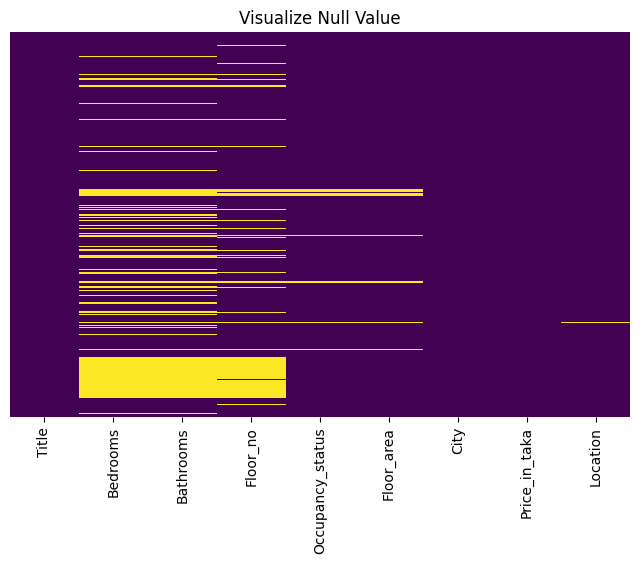

In [44]:
# Visualize the null values in dataset
plt.figure(figsize=(8,5))
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Visualize Null Value")
plt.show()

## Drop null values

In [45]:
df.dropna(subset=['Occupancy_status', 'Floor_area', 'Location'], inplace=True)

In [46]:
# most homes likely to have at least 3 bedrooms and 2 bathrooms
df['Bedrooms'].fillna(3., inplace=True)
df['Bathrooms'].fillna(2., inplace=True)

In [47]:
df['Floor_no'].unique()

array(['3', '1', '6', '4', '8', '2', '5', '7', '9', '8th', nan, '10',
       '14', 'G+7', '13', '12', '1st', '11', 'A1,A2,A3,A4,A5,A6,A7',
       '0+7', '1F', '4th to 8th Backside', '18', '5th', '17',
       'Merin City - Purbach'], dtype=object)

In [48]:
df['Floor_no'].value_counts()

Floor_no
1                       532
4                       418
5                       402
2                       397
3                       366
6                       315
7                       252
8                       228
9                       167
10                       30
11                       26
12                       19
13                        8
Merin City - Purbach      6
14                        2
8th                       2
4th to 8th Backside       2
1st                       1
A1,A2,A3,A4,A5,A6,A7      1
0+7                       1
1F                        1
18                        1
5th                       1
17                        1
G+7                       1
Name: count, dtype: int64

In [49]:
# Convert to numeric, non-numeric values become NaN
df['Floor_no'] = pd.to_numeric(df['Floor_no'], errors='coerce')

In [50]:
# Impute missing values with the mode
df['Floor_no'].fillna(df['Floor_no'].mode()[0], inplace=True)

In [51]:
# Recheck null values
df.isna().sum()

Title               0
Bedrooms            0
Bathrooms           0
Floor_no            0
Occupancy_status    0
Floor_area          0
City                0
Price_in_taka       0
Location            0
dtype: int64

In [52]:
# Recheck shape of the dataset
df.shape

(3765, 9)

In [53]:
df.head()

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
0,We Are Offering You A Very Spacious 1960 Sq Ft...,3.0,4.0,3.0,vacant,1960.0,dhaka,"৳39,000,000","Gulshan 1, Gulshan"
1,Valuable 1705 Square Feet Apartment Is Ready T...,3.0,3.0,1.0,vacant,1705.0,dhaka,"৳16,900,000","Lake Circus Road, Kalabagan"
2,1370 square feet apartment is ready to sale in...,3.0,3.0,6.0,vacant,1370.0,dhaka,"৳12,500,000","Shukrabad, Dhanmondi"
3,2125 Square Feet Apartment For Sale In Bashund...,3.0,3.0,4.0,vacant,2125.0,dhaka,"৳20,000,000","Block L, Bashundhara R-A"
4,Buy This 2687 Square Feet Flat In The Nice Are...,3.0,3.0,4.0,vacant,2687.0,dhaka,"৳47,500,000","Road No 25, Banani"


## Check duplicates

In [54]:
df.duplicated().sum()

924

## Drop duplicates

In [55]:
df = df.drop_duplicates()

In [56]:
# Recheck shape of the dataset
df.shape

(2841, 9)

## Check data type 

In [57]:
df.dtypes

Title                object
Bedrooms            float64
Bathrooms           float64
Floor_no            float64
Occupancy_status     object
Floor_area          float64
City                 object
Price_in_taka        object
Location             object
dtype: object

## Convert data types

In [58]:
# Convert 'Bedrooms', 'Bathrooms', 'Floor_no', 'Floor_area', Price_in_taka' into integer
df['Bedrooms'] = df['Bedrooms'].astype('int64')
df['Bathrooms'] = df['Bathrooms'].astype('int64')
df['Floor_no'] = df['Floor_no'].astype('int64')
df['Floor_area'] = df['Floor_area'].astype('int64')

# Remove the '৳' symbol
df['Price_in_taka'] = df['Price_in_taka'].str.replace('৳', '', regex=False)
# Remove commas
df['Price_in_taka'] = df['Price_in_taka'].str.replace(',', '', regex=False)
# Convert to numeric
df['Price_in_taka'] = pd.to_numeric(df['Price_in_taka'])

In [59]:
df.dtypes

Title               object
Bedrooms             int64
Bathrooms            int64
Floor_no             int64
Occupancy_status    object
Floor_area           int64
City                object
Price_in_taka        int64
Location            object
dtype: object

## Drop unnecessary column

In [60]:
# Drop 'Title' column from the dataset
df.drop('Title', axis=1, inplace=True)

In [61]:
df['Occupancy_status'].unique()

array(['vacant', 'occupied'], dtype=object)

In [62]:
df['Occupancy_status'].value_counts()

Occupancy_status
vacant      2839
occupied       2
Name: count, dtype: int64

Since the column is highly imbalanced (almost all values are vacant), it likely has little predictive value.

In [63]:
# Drop 'Occupancy_status' from the dataset
df = df.drop(columns=['Occupancy_status'])

In [64]:
df.head()

,Bedrooms,Bathrooms,Floor_no,Floor_area,City,Price_in_taka,Location
0,3,4,3,1960,dhaka,39000000,"Gulshan 1, Gulshan"
1,3,3,1,1705,dhaka,16900000,"Lake Circus Road, Kalabagan"
2,3,3,6,1370,dhaka,12500000,"Shukrabad, Dhanmondi"
3,3,3,4,2125,dhaka,20000000,"Block L, Bashundhara R-A"
4,3,3,4,2687,dhaka,47500000,"Road No 25, Banani"


## Checking the number of unique values of each column

In [65]:
df.nunique()

Bedrooms          20
Bathrooms          8
Floor_no          16
Floor_area       668
City               5
Price_in_taka    675
Location         482
dtype: int64

## Check statistics of data set

In [66]:
df.describe()

,Bedrooms,Bathrooms,Floor_no,Floor_area,Price_in_taka
count,2841.000000,2841.000000,2841.000000,2841.000000,2.841000e+03
mean,3.084829,2.734952,3.938402,1959.321366,1.175799e+07
std,1.791859,0.934363,2.808452,6033.044687,2.640723e+07
min,1.000000,1.000000,1.000000,84.000000,1.050000e+06
25%,3.000000,2.000000,1.000000,1100.000000,4.800000e+06
50%,3.000000,3.000000,4.000000,1392.000000,6.900000e+06
75%,3.000000,3.000000,6.000000,1950.000000,1.015000e+07
max,50.000000,10.000000,18.000000,195840.000000,5.320000e+08


## Drop outliers

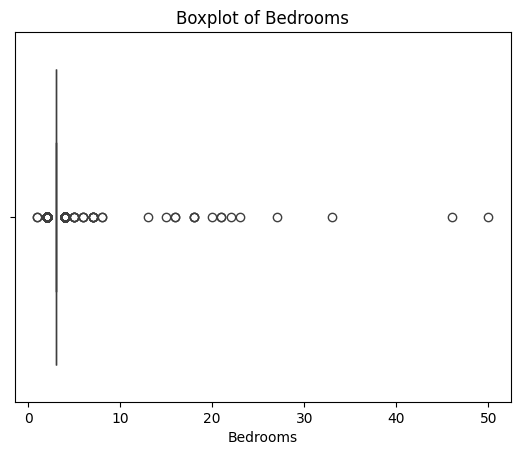

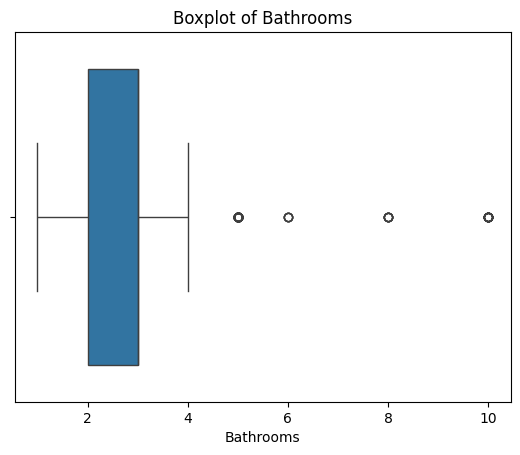

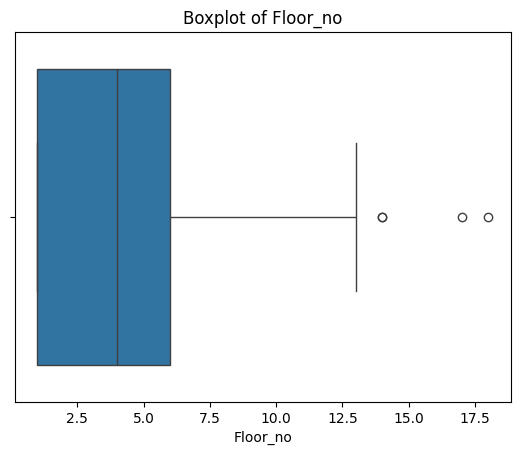

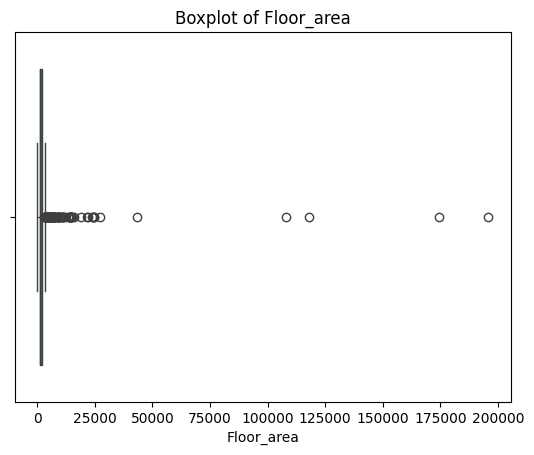

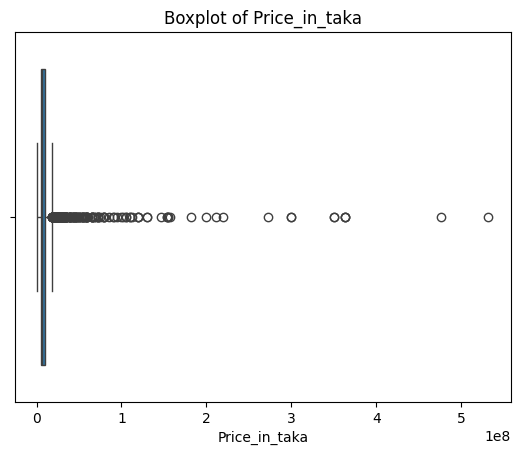

In [67]:
# Visualize each feature to identify outliers
for col in ['Bedrooms', 'Bathrooms', 'Floor_no', 'Floor_area', 'Price_in_taka']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [68]:
# IQR method to identify outliers
for col in ['Bedrooms', 'Bathrooms', 'Floor_no', 'Floor_area', 'Price_in_taka']:
    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove rows outside the bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [69]:
df.describe()

,Bedrooms,Bathrooms,Floor_no,Floor_area,Price_in_taka
count,1762.0,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,3.0,2.807037,4.291146,1447.185017,7.537294e+06
std,0.0,0.514631,2.792425,363.385597,3.046873e+06
min,3.0,1.000000,1.000000,240.000000,1.500000e+06
25%,3.0,3.000000,2.000000,1235.000000,5.189875e+06
50%,3.0,3.000000,4.000000,1385.000000,6.901250e+06
75%,3.0,3.000000,6.000000,1600.000000,9.200000e+06
max,3.0,4.000000,13.000000,2520.000000,1.690000e+07


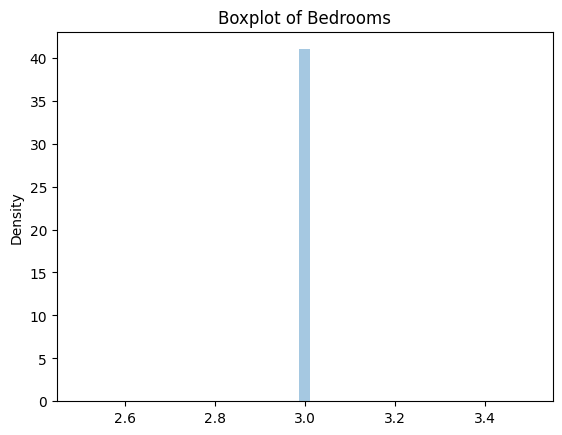

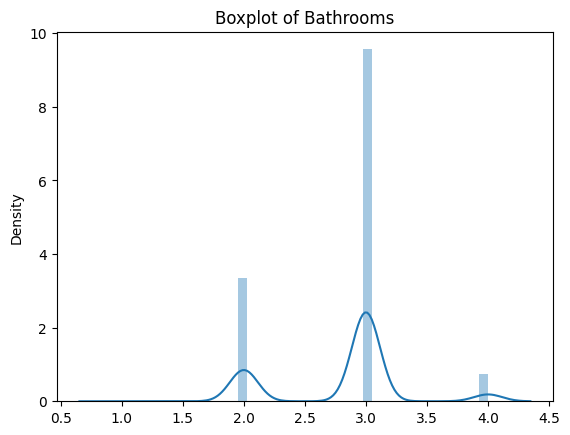

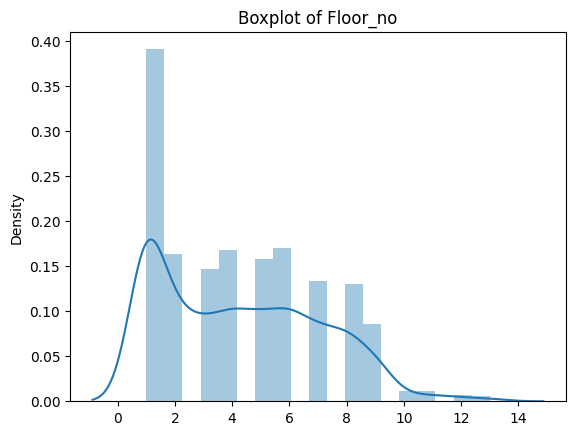

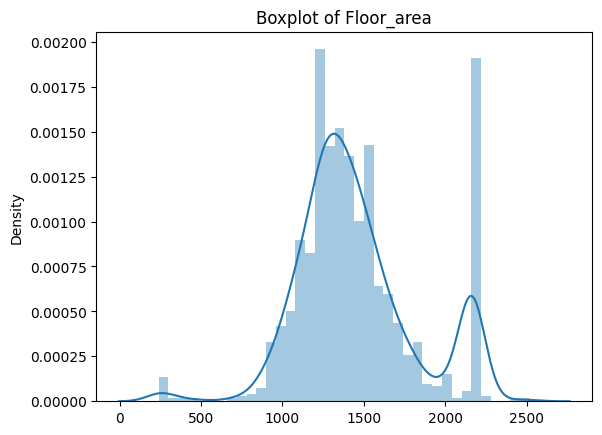

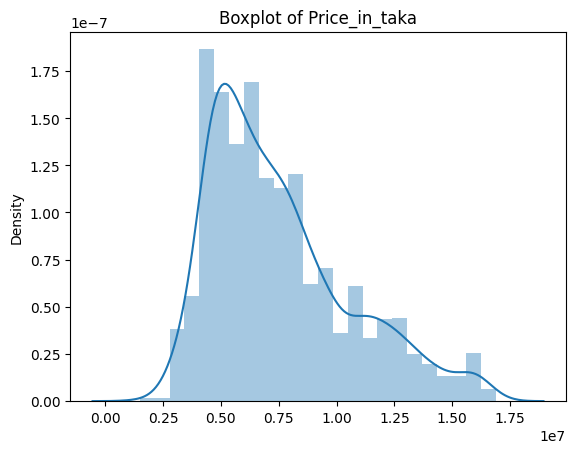

In [70]:
# Data distribution of each feature
for col in ['Bedrooms', 'Bathrooms', 'Floor_no', 'Floor_area', 'Price_in_taka']:
    sns.distplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


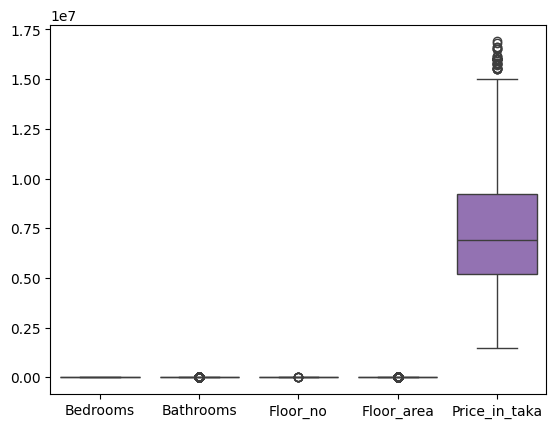

In [71]:
# After removing outliers
sns.boxplot(df)
plt.show()

## Exploring Data

In [72]:
df.head()

,Bedrooms,Bathrooms,Floor_no,Floor_area,City,Price_in_taka,Location
1,3,3,1,1705,dhaka,16900000,"Lake Circus Road, Kalabagan"
2,3,3,6,1370,dhaka,12500000,"Shukrabad, Dhanmondi"
5,3,3,3,1150,dhaka,8800000,"Middle Badda, Badda"
8,3,3,8,1397,dhaka,8000000,"Matuail, Demra"
10,3,3,3,1300,dhaka,8000000,"West Dolairpar, Shyampur"


## Modify 'Location' column

In [73]:
df['Location'] = df['Location'].apply(lambda x: x.split(',')[-1].strip())

In [74]:
df.head()

,Bedrooms,Bathrooms,Floor_no,Floor_area,City,Price_in_taka,Location
1,3,3,1,1705,dhaka,16900000,Kalabagan
2,3,3,6,1370,dhaka,12500000,Dhanmondi
5,3,3,3,1150,dhaka,8800000,Badda
8,3,3,8,1397,dhaka,8000000,Demra
10,3,3,3,1300,dhaka,8000000,Shyampur


In [75]:
# define numerical and categorical features
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['Bedrooms', 'Bathrooms', 'Floor_no', 'Floor_area', 'Price_in_taka']

We have 2 categorical features : ['City', 'Location']


## Histogram & KDE

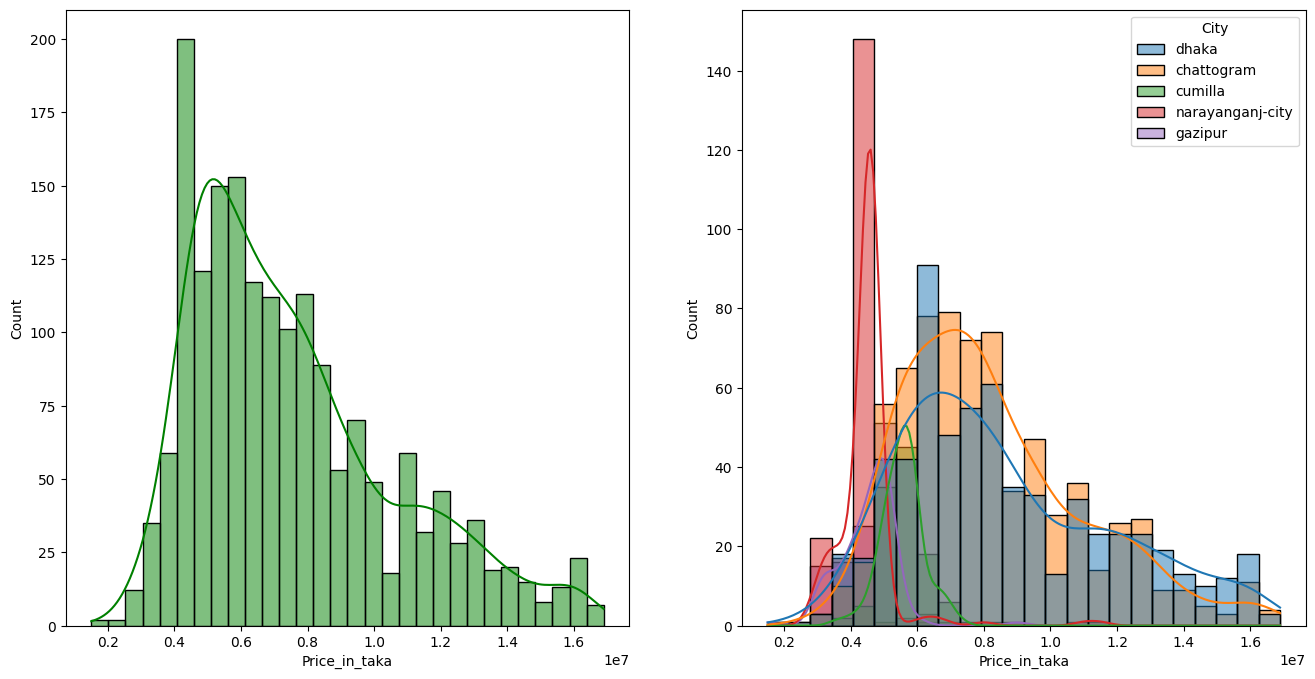

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
plt.subplot(121)
sns.histplot(data=df, x='Price_in_taka',bins = 30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Price_in_taka', hue='City', kde=True)
plt.show()

  - **Narayanganj-city (red)**: Houses are mostly concentrated at the lower price range (~2–5 million taka). This indicates a less expensive housing market.
   - **Dhaka (blue)**: A wider spread of prices, with more properties in the higher range (~6–14 million taka), suggesting a diverse and expensive housing market.
   - **Chattogram (orange)**: The price distribution shows a moderate range, with peaks slightly higher than Narayanganj but lower than Dhaka.
   - **Gazipur (green)** and **Cumilla (gray)**: These cities have limited distributions and align more closely with Narayanganj’s lower price trends.

2. **Affordability**:
   - Cities like Narayanganj and Gazipur might be more affordable compared to Dhaka and Chattogram.
   - Dhaka likely represents premium properties or highly sought-after locations, driving up prices.

3. **Overlap Between Cities**:
   - Some overlap exists between cities like Dhaka and Chattogram, but Narayanganj clearly stands out as the least expensive market.
